# Outbreak Simulator

In [1]:
from SpatialScan.region import *
from SpatialScan.likelihood import *
from SpatialScan.results import *
from SpatialScan.scan import *
from SpatialScan.synthetic import *
from SpatialScan.timeseries import *
from SpatialScan.preprocessing import *

import pandas as pd

## Set Model Parameters

In [2]:
# Set these Variables First
OUTBREAK_LENGTH=5
NORMAL_ANALYSIS_DAYS=5
DAYS_IN_PAST=14
DAYS_IN_FUTURE=2

LON_MIN = -0.349749335498348
LON_MAX = -0.25056950567589603
LAT_MIN = 51.45083323706079
LAT_MAX = 51.5408981075881

## Get Synthetic data from File

In [3]:
synth_df = pd.read_csv("../data/simulation/synthetic_scoot_april_june.csv", infer_datetime_format=True, parse_dates=[1, 4])
synth_df = synth_df[(synth_df['lon'].between(LON_MIN, LON_MAX)) & (synth_df['lat'].between(LAT_MIN, LAT_MAX))]

In [4]:
total_days_of_required_data = OUTBREAK_LENGTH + NORMAL_ANALYSIS_DAYS + DAYS_IN_PAST

In [5]:
t_min = synth_df['measurement_end_utc'].max() - np.timedelta64(total_days_of_required_data, 'D')
forecast_start = t_min + np.timedelta64(DAYS_IN_PAST, 'D')
first_analysis_day = forecast_start + np.timedelta64(DAYS_IN_FUTURE, 'D')
synth_df = synth_df[synth_df['measurement_start_utc'] >= t_min].copy()

Now have 34 days worth of data in Ealing

In [6]:
synth_df

detector_id measurement_end_utc       lon        lat  \
888      N24/002b1 2020-05-12 01:00:00 -0.285622  51.462133   
889      N24/002b1 2020-05-12 02:00:00 -0.285622  51.462133   
890      N24/002b1 2020-05-12 03:00:00 -0.285622  51.462133   
891      N24/002b1 2020-05-12 04:00:00 -0.285622  51.462133   
892      N24/002b1 2020-05-12 05:00:00 -0.285622  51.462133   
...            ...                 ...       ...        ...   
671971   N28/140g1 2020-06-04 20:00:00 -0.276751  51.538122   
671972   N28/140g1 2020-06-04 21:00:00 -0.276751  51.538122   
671973   N28/140g1 2020-06-04 22:00:00 -0.276751  51.538122   
671974   N28/140g1 2020-06-04 23:00:00 -0.276751  51.538122   
671975   N28/140g1 2020-06-05 00:00:00 -0.276751  51.538122   

       measurement_start_utc  n_vehicles_in_interval  rolling_threshold  \
888      2020-05-12 00:00:00                      15         227.205374   
889      2020-05-12 01:00:00                       0         228.154098   
890      2020-05-12 02:00:00                      11         231.214946   
891      2020-05-12 03:00:00                      22                NaN   
892      2020-05-12 04:00:00                      35                NaN   
...                      ...                     ...                ...   
671971   2020-06-04 19:00:00                     404        1339.610887   
671972   2020-06-04 20:00:00                     255        1337.103390   
671973   2020-06-04 21:00:00                      26        1340.919715   
671974   2020-06-04 22:00:00                     126        1343.364932   
671975   2020-06-04 23:00:00                      24        1340.796783   

        global_threshold  Num_Anom  Num_Missing  
888           308.356339       0.0           10  
889           308.356339       0.0           10  
890           308.356339       0.0           10  
891                  NaN       NaN           10  
892                  NaN       NaN           10  
...                  ...       ...          ...  
671971        972.069431       0.0            4  
671972        972.069431       0.0            4  
671973        972.069431       0.0            4  
671974        972.069431       0.0            4  
671975        972.069431       0.0            4  

[263808 rows x 10 columns]

## Simulate an Outbreak which lasts for the last `OUTBREAK_LENGTH` days

Simulate an outbreak for the last 3

In [7]:
outbreak_df, outbreak_detectors, outbreak_start = simulate_outbreak(synth_df, severity=50, k_min=1, k_max=75, outbreak_duration=OUTBREAK_LENGTH)

Outbreak centred at (-0.295034837756049, 51.5321338356957) affecting 50 detectors
['N27/130b1' 'N27/101q1' 'N27/102b1' 'N27/101c1' 'N27/101a1' 'N27/101a2'
 'N27/102a1' 'N27/101b2' 'N27/101b1' 'N27/102x2' 'N27/100c1' 'N27/100x1'
 'N27/004b1' 'N27/100b1' 'N27/100s1' 'N27/004a1' 'N27/130a1' 'N27/130a2'
 'N27/004x2' 'N27/102c2' 'N27/004f3' 'N27/004g1' 'N27/004g2' 'N27/004f1'
 'N27/004f2' 'N27/010d1' 'N27/093e1' 'N27/010c1' 'N27/245b1' 'N27/011a1'
 'N27/018b1' 'N27/247x1' 'N27/169a1' 'N27/018e1' 'N28/140g1' 'N27/247a1'
 'N27/071a1' 'N27/018f1' 'N27/247f1' 'N27/247e1' 'N27/090b1' 'N27/169b1'
 'N27/011d1' 'N27/093g1' 'N27/018d1' 'N27/169c1' 'N27/219b1' 'N27/219b2'
 'N27/044c1' 'N27/011h1']
Start of outbreak: 2020-05-31 00:00:00


Text(2020-05-28 00:00:00, 1500, 'Analysis Begins')

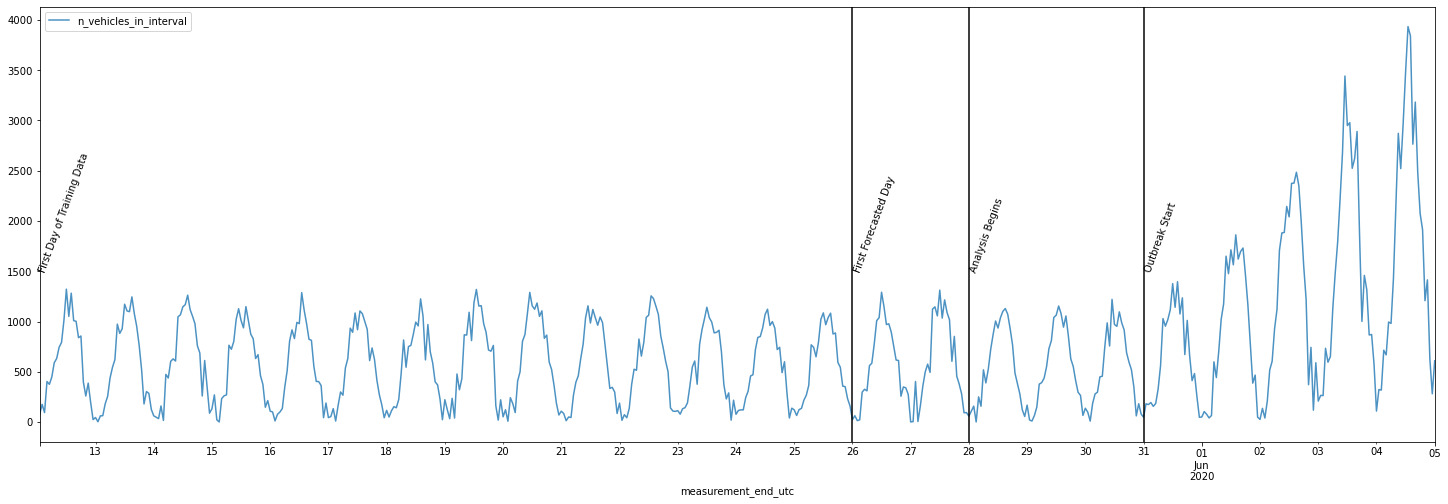

In [8]:
outbreak_df[outbreak_df['detector_id'] == 'N27/011a1'].plot(x='measurement_end_utc', y='n_vehicles_in_interval', figsize=(25, 8), alpha=0.8)
plt.axvline(x=outbreak_start, c='k')
plt.text(outbreak_start,1500,'Outbreak Start',rotation=70, size=10)

plt.axvline(x=t_min, c='k')
plt.text(t_min,1500,'First Day of Training Data',rotation=70, size=10)

plt.axvline(x=forecast_start, c='k')
plt.text(forecast_start ,1500,'First Forecasted Day',rotation=70, size=10)

plt.axvline(x=first_analysis_day, c='k')
plt.text(first_analysis_day,1500,'Analysis Begins',rotation=70, size=10)

Run Scans over the 34 - 28 = 6 days, looking one day back each time, using the method prescribed.

Total number of days in dataframe:  24
Producing forecasts and scans for 9 days in total.


Analysis day: 2020-05-28 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-05-28 00:00:00.
Using data from 2020-05-12 00:00:00 to 2020-05-26 00:00:00, to forecast counts between 2020-05-26 00:00:00 and 2020-05-28 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


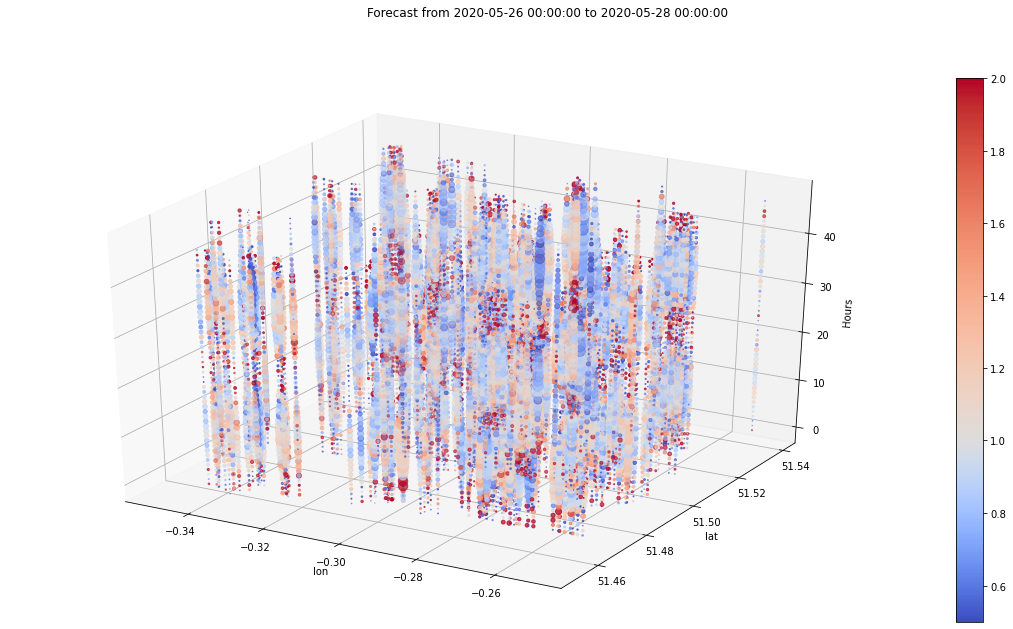

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.25 seconds
Search spatial regions with t_min = 2020-05-26 00:00:00 and t_max = 2020-05-28 00:00:00
32448 space-time regions searched in 91.14 seconds
Total run time: 99.39 seconds


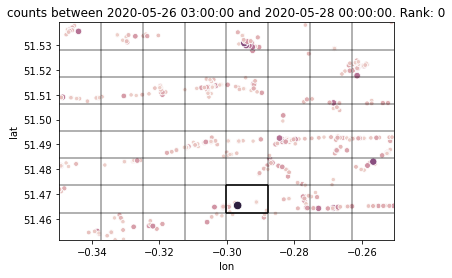


Analysis day: 2020-05-29 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-05-29 00:00:00.
Using data from 2020-05-13 00:00:00 to 2020-05-27 00:00:00, to forecast counts between 2020-05-27 00:00:00 and 2020-05-29 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


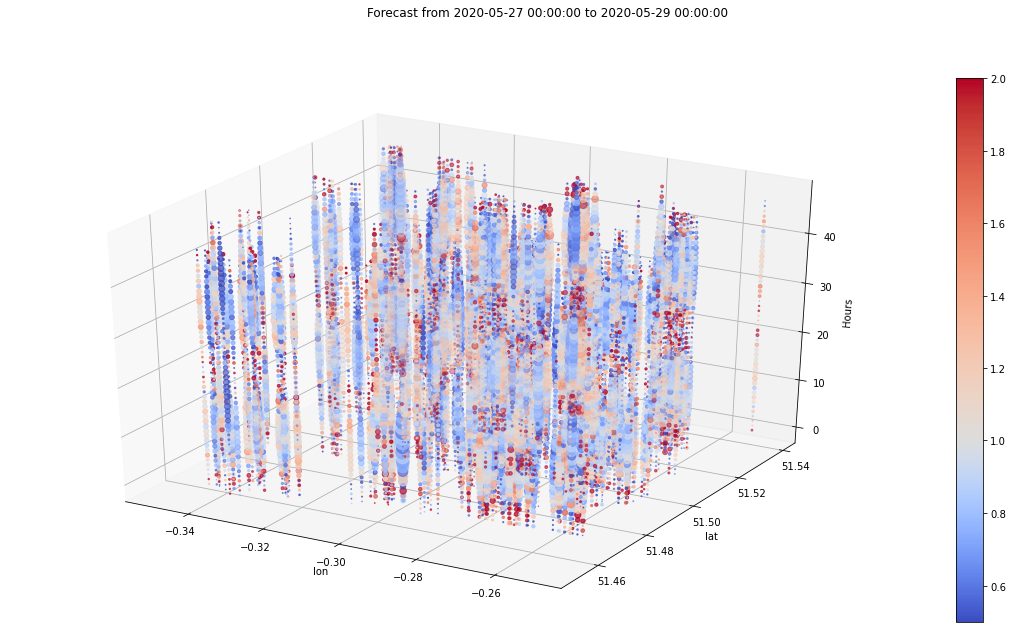

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.78 seconds
Search spatial regions with t_min = 2020-05-27 00:00:00 and t_max = 2020-05-29 00:00:00
32448 space-time regions searched in 81.23 seconds
Total run time: 89.01 seconds


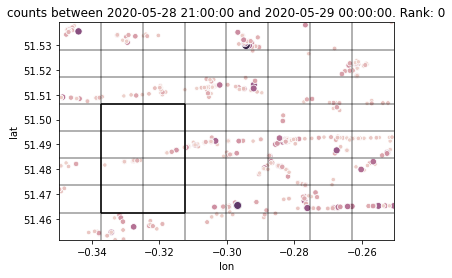


Analysis day: 2020-05-30 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-05-30 00:00:00.
Using data from 2020-05-14 00:00:00 to 2020-05-28 00:00:00, to forecast counts between 2020-05-28 00:00:00 and 2020-05-30 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


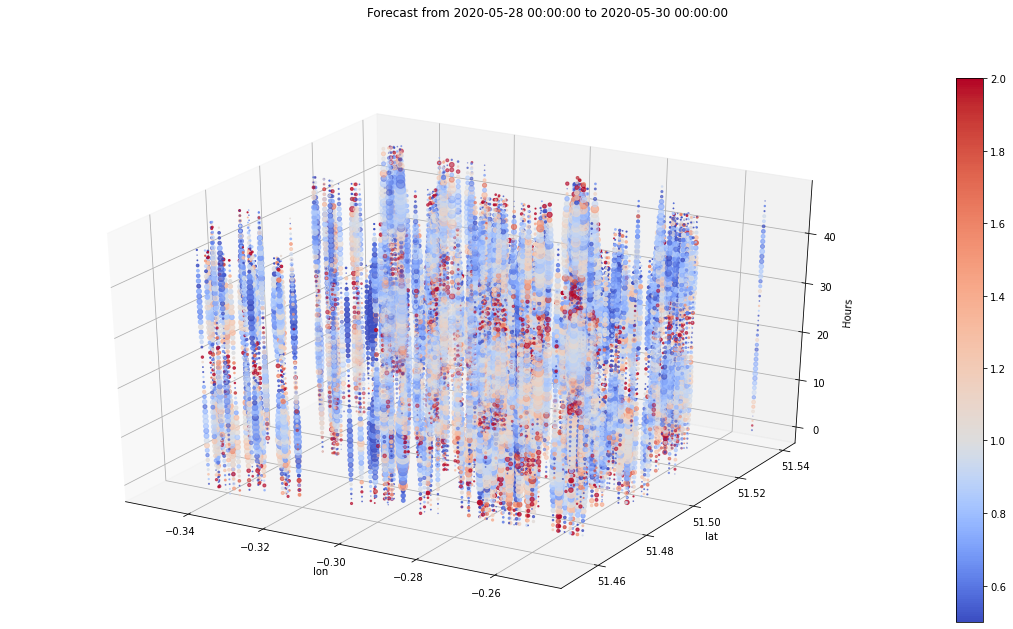

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.87 seconds
Search spatial regions with t_min = 2020-05-28 00:00:00 and t_max = 2020-05-30 00:00:00
32448 space-time regions searched in 81.39 seconds
Total run time: 89.25 seconds


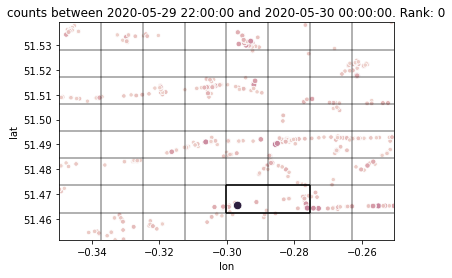


Analysis day: 2020-05-31 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-05-31 00:00:00.
Using data from 2020-05-15 00:00:00 to 2020-05-29 00:00:00, to forecast counts between 2020-05-29 00:00:00 and 2020-05-31 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


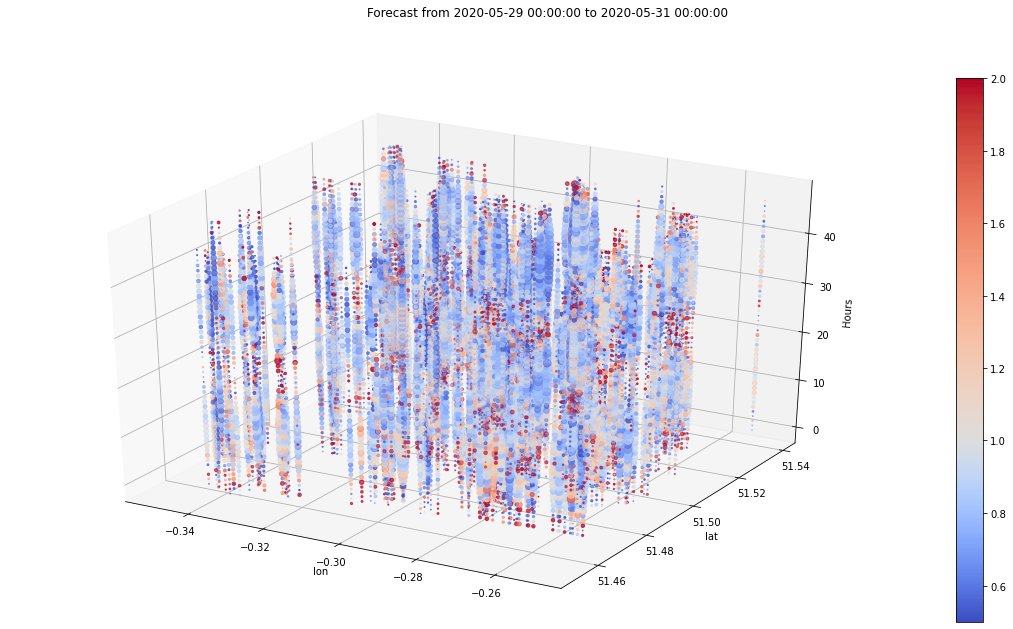

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.78 seconds
Search spatial regions with t_min = 2020-05-29 00:00:00 and t_max = 2020-05-31 00:00:00
32448 space-time regions searched in 81.44 seconds
Total run time: 89.23 seconds


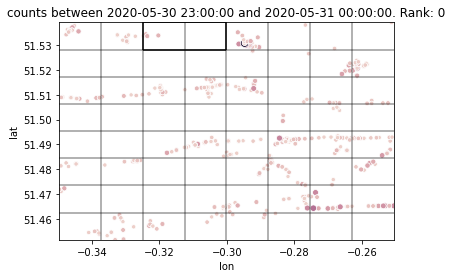


Analysis day: 2020-06-01 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-06-01 00:00:00.
Using data from 2020-05-16 00:00:00 to 2020-05-30 00:00:00, to forecast counts between 2020-05-30 00:00:00 and 2020-06-01 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


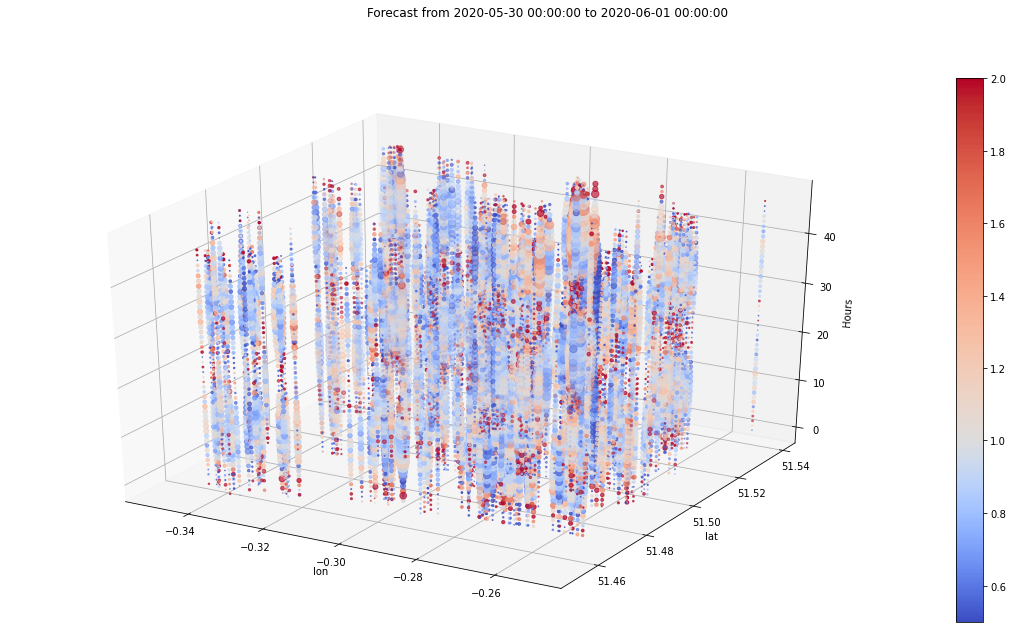

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.79 seconds
Search spatial regions with t_min = 2020-05-30 00:00:00 and t_max = 2020-06-01 00:00:00
32448 space-time regions searched in 81.70 seconds
Total run time: 89.49 seconds


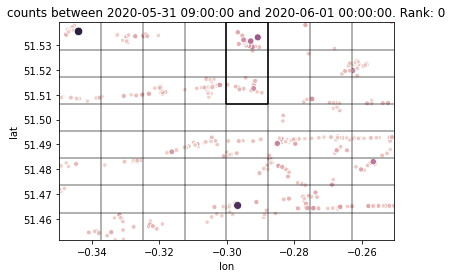


Analysis day: 2020-06-02 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-06-02 00:00:00.
Using data from 2020-05-17 00:00:00 to 2020-05-31 00:00:00, to forecast counts between 2020-05-31 00:00:00 and 2020-06-02 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


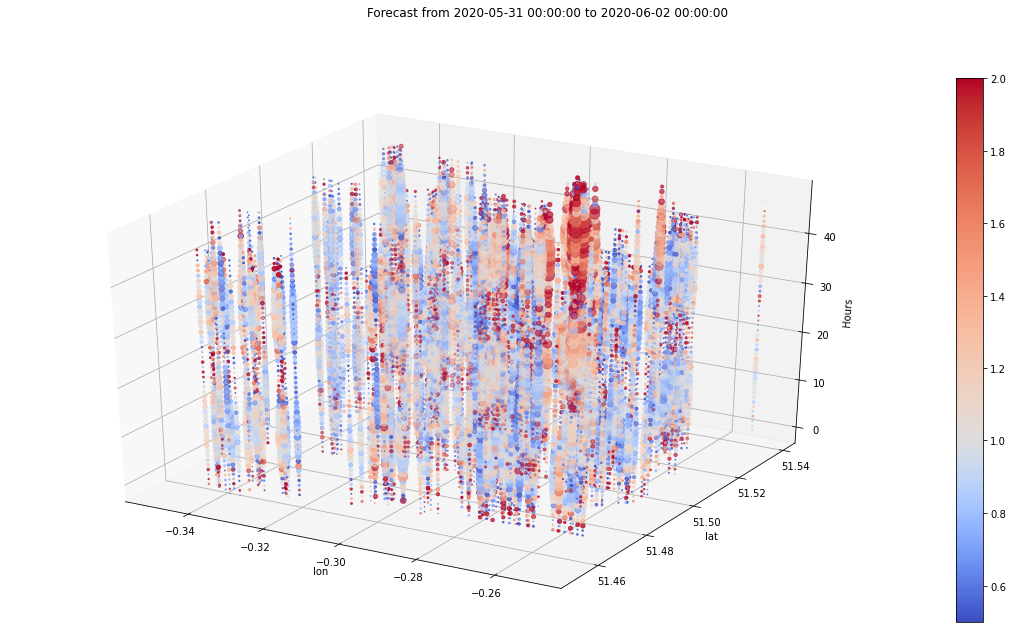

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.81 seconds
Search spatial regions with t_min = 2020-05-31 00:00:00 and t_max = 2020-06-02 00:00:00
32448 space-time regions searched in 81.62 seconds
Total run time: 89.43 seconds


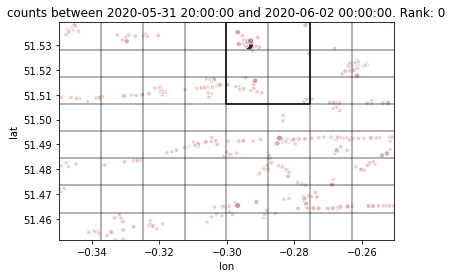


Analysis day: 2020-06-03 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-06-03 00:00:00.
Using data from 2020-05-18 00:00:00 to 2020-06-01 00:00:00, to forecast counts between 2020-06-01 00:00:00 and 2020-06-03 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


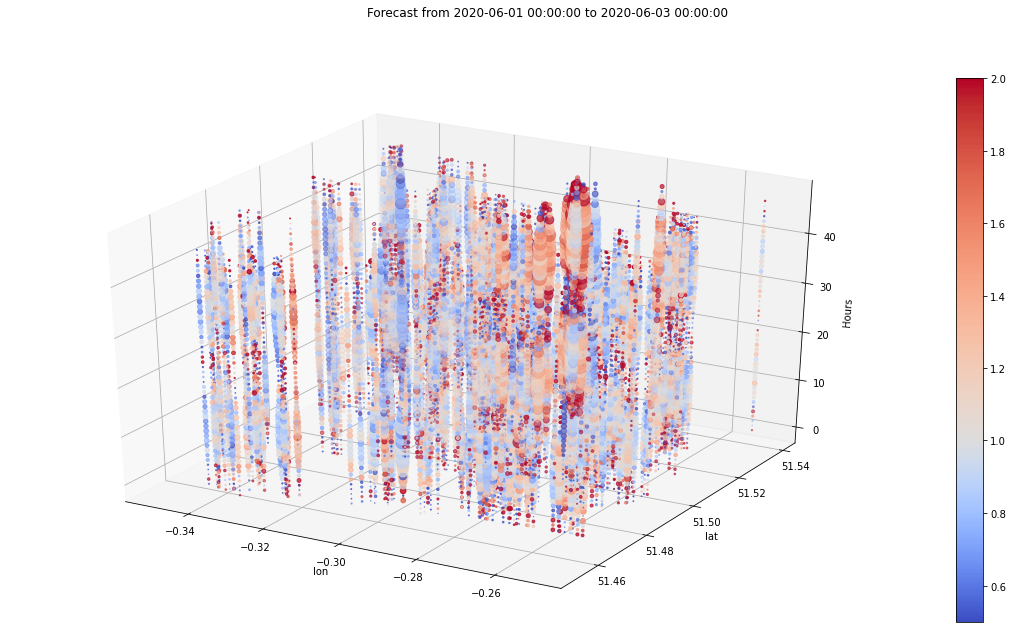

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.76 seconds
Search spatial regions with t_min = 2020-06-01 00:00:00 and t_max = 2020-06-03 00:00:00
32448 space-time regions searched in 81.89 seconds
Total run time: 89.64 seconds


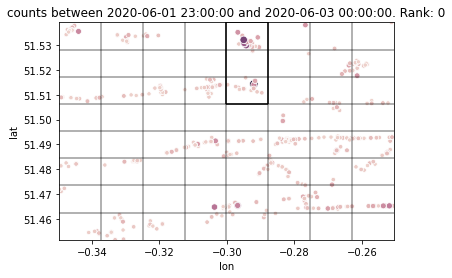


Analysis day: 2020-06-04 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-06-04 00:00:00.
Using data from 2020-05-19 00:00:00 to 2020-06-02 00:00:00, to forecast counts between 2020-06-02 00:00:00 and 2020-06-04 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


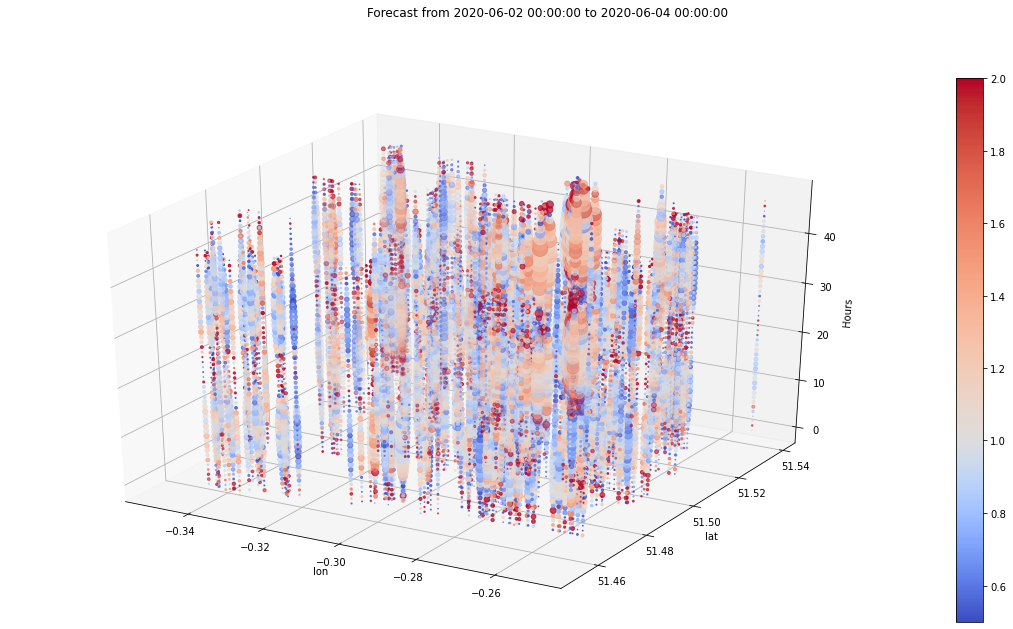

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 10.67 seconds
Search spatial regions with t_min = 2020-06-02 00:00:00 and t_max = 2020-06-04 00:00:00
32448 space-time regions searched in 86.22 seconds
Total run time: 96.90 seconds


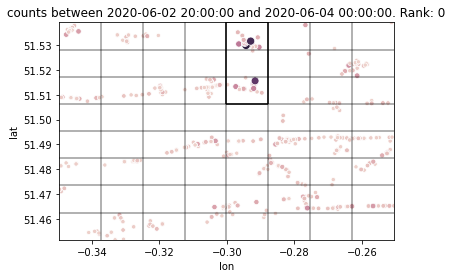


Analysis day: 2020-06-05 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-12 00:00:00 to 2020-06-05 00:00:00.
Using data from 2020-05-20 00:00:00 to 2020-06-03 00:00:00, to forecast counts between 2020-06-03 00:00:00 and 2020-06-05 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


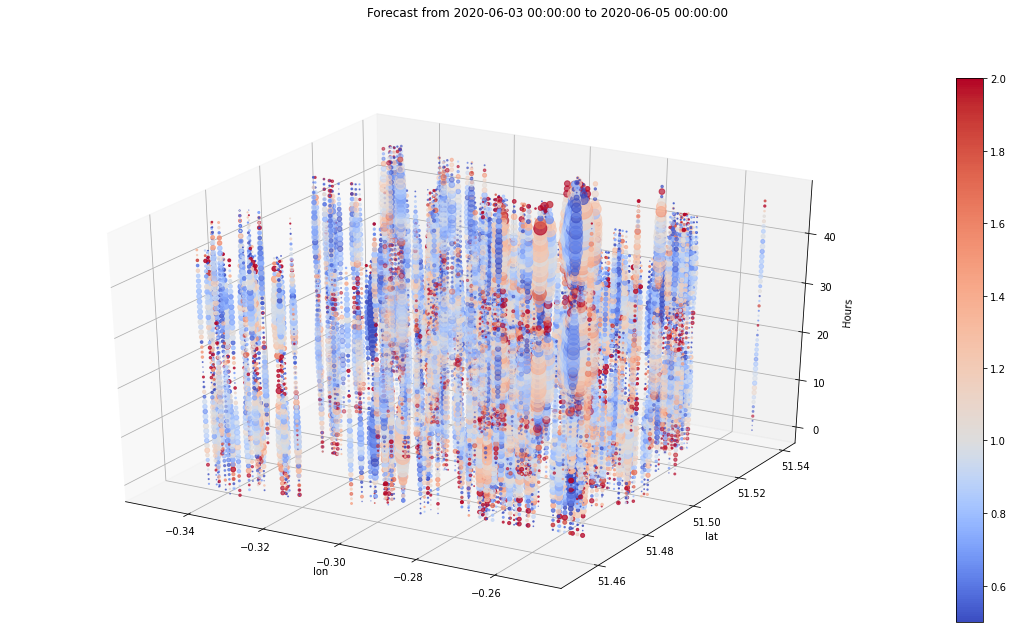

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 7.92 seconds
Search spatial regions with t_min = 2020-06-03 00:00:00 and t_max = 2020-06-05 00:00:00
32448 space-time regions searched in 86.32 seconds
Total run time: 94.24 seconds


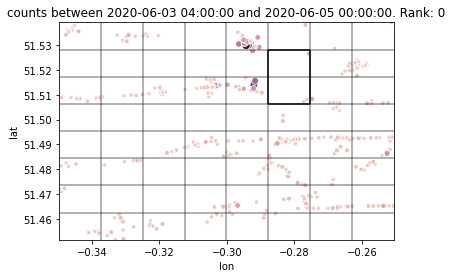

In [10]:
database_results, highest_regions = results_builder(outbreak_df, days_in_past=DAYS_IN_PAST, days_in_future=DAYS_IN_FUTURE, method='HW', grid_partition=8, scan_type='normal')

In [11]:
database_results

start_time_utc end_time_utc  point_id     x_min     x_max  \
0     2020-05-26 00:00:00   2020-05-28         0 -0.349749 -0.337352   
1     2020-05-26 00:00:00   2020-05-28         1 -0.337352 -0.324954   
2     2020-05-26 00:00:00   2020-05-28         2 -0.324954 -0.312557   
3     2020-05-26 00:00:00   2020-05-28         3 -0.312557 -0.300159   
4     2020-05-26 00:00:00   2020-05-28         4 -0.300159 -0.287762   
...                   ...          ...       ...       ...       ...   
15355 2020-06-04 23:00:00   2020-06-05        59 -0.312557 -0.300159   
15356 2020-06-04 23:00:00   2020-06-05        60 -0.300159 -0.287762   
15357 2020-06-04 23:00:00   2020-06-05        61 -0.287762 -0.275364   
15358 2020-06-04 23:00:00   2020-06-05        62 -0.275364 -0.262967   
15359 2020-06-04 23:00:00   2020-06-05        63 -0.262967 -0.250570   

           y_min      y_max  observed_count  forecasted_count  \
0      51.451503  51.462464        4.945204          5.360242   
1      51.451503  51.462464       10.598478         11.359891   
2      51.451503  51.462464       15.690724         16.568488   
3      51.451503  51.462464       21.537782         22.769906   
4      51.451503  51.462464       26.994314         28.176298   
...          ...        ...             ...               ...   
15355  51.528227  51.539188        0.177030          0.172138   
15356  51.528227  51.539188        0.262486          0.248080   
15357  51.528227  51.539188        0.166484          0.161907   
15358  51.528227  51.539188        0.092521          0.095095   
15359  51.528227  51.539188        0.038381          0.041556   

       av_lhd_score_basic  av_lhd_score_eps_000  av_lhd_score_eps_025  \
0                1.000000             -0.000106             -0.009171   
1                1.000000             -0.000059             -0.009985   
2                1.000003              0.000073             -0.009480   
3                1.000000              0.000034             -0.011102   
4                1.000010              0.000233             -0.011047   
...                   ...                   ...                   ...   
15355            1.000009              0.000047             -0.000043   
15356            1.000015              0.000084             -0.000018   
15357            1.000008              0.000043             -0.000043   
15358            1.000002              0.000007             -0.000074   
15359            1.000001             -0.000003             -0.000079   

       av_lhd_score_eps_050  av_lhd_score_eps_075  av_lhd_score_eps_100  
0                 -0.029239             -0.056480             -0.088632  
1                 -0.033104             -0.064789             -0.102296  
2                 -0.033297             -0.066351             -0.105581  
3                 -0.038643             -0.076514             -0.121108  
4                 -0.041278             -0.083335             -0.132891  
...                     ...                   ...                   ...  
15355             -0.000215             -0.000517             -0.000916  
15356             -0.000220             -0.000606             -0.001127  
15357             -0.000214             -0.000514             -0.000910  
15358             -0.000237             -0.000493             -0.000817  
15359             -0.000227             -0.000443             -0.000708  

[15360 rows x 15 columns]

In [12]:
highest_regions

x_min     x_max      y_min      y_max               t_min      t_max  \
0 -0.300159 -0.287762  51.462464  51.473424 2020-05-26 03:00:00 2020-05-28   
1 -0.337352 -0.312557  51.462464  51.506306 2020-05-28 21:00:00 2020-05-29   
2 -0.300159 -0.275364  51.462464  51.473424 2020-05-29 22:00:00 2020-05-30   
3 -0.324954 -0.300159  51.528227  51.539188 2020-05-30 23:00:00 2020-05-31   
4 -0.300159 -0.287762  51.506306  51.539188 2020-05-31 09:00:00 2020-06-01   
5 -0.300159 -0.275364  51.506306  51.539188 2020-05-31 20:00:00 2020-06-02   
6 -0.300159 -0.287762  51.506306  51.539188 2020-06-01 23:00:00 2020-06-03   
7 -0.300159 -0.287762  51.506306  51.539188 2020-06-02 20:00:00 2020-06-04   
8 -0.287762 -0.275364  51.506306  51.528227 2020-06-03 04:00:00 2020-06-05   

   l_score_basic  l_score_000  l_score_025  l_score_050  l_score_075  \
0       1.000452     0.001558    -0.000691    -0.006972    -0.018096   
1       1.000068     0.000143     0.000023    -0.000002    -0.000049   
2       1.000143     0.000333     0.000093     0.000004    -0.000021   
3       1.000057     0.000077     0.000051     0.000032     0.000020   
4       1.001073     0.004795    -0.000150    -0.006876    -0.021222   
5       1.025598     0.031047     0.005292    -0.000268    -0.009043   
6       1.022273     0.021505     0.001054    -0.004326    -0.023230   
7       1.007892     0.011301    -0.000586    -0.018529    -0.054996   
8       1.000478     0.001236     0.000037    -0.000371    -0.001760   

   l_score_100        day  
0    -0.032686 2020-05-28  
1    -0.000147 2020-05-29  
2    -0.000115 2020-05-30  
3     0.000011 2020-05-31  
4    -0.040958 2020-06-01  
5    -0.027503 2020-06-02  
6    -0.052980 2020-06-03  
7    -0.104025 2020-06-04  
8    -0.003918 2020-06-05

In [15]:
#highest_regions.to_csv('highest.csv', index=False)

In [16]:
#outbreak_df.to_csv('outbreak.csv', index=False)

In [17]:
#outbreak_detectors.to_csv('outbreak_detectors.csv', index=False)

In [18]:
#database_results.to_csv('database_results.csv', index=False)

Dataframe contains data from the database spanning 2020-05-26 00:00:00 to 2020-06-05 00:00:00.


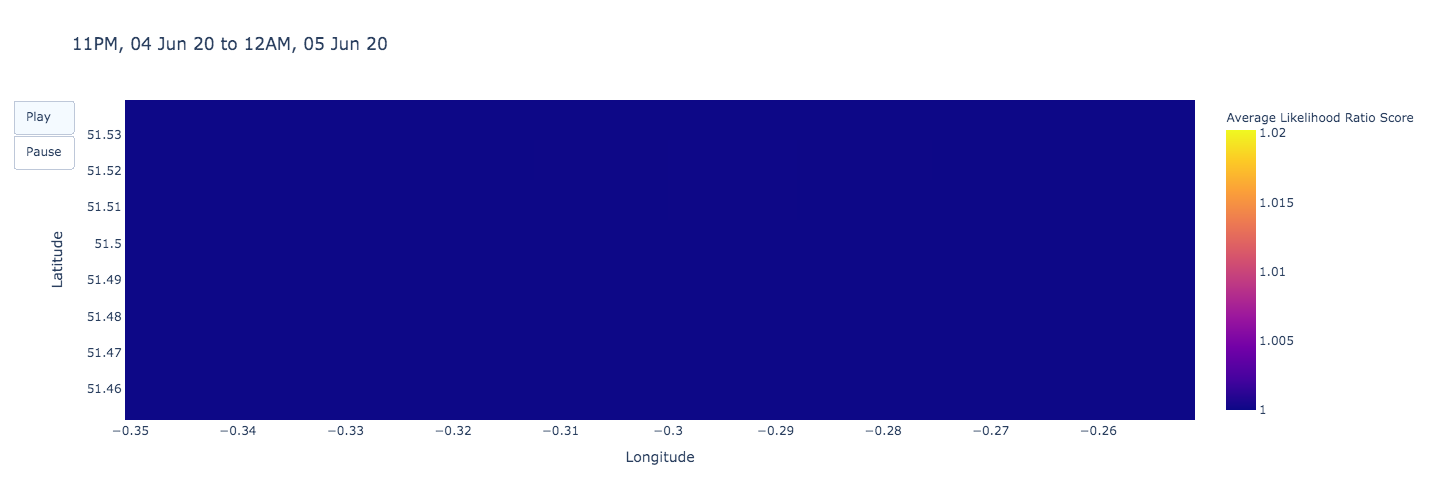

{'max': 1.0202578111465717, 'min': 1.0}

In [13]:
visualise_results_from_database(database_results)